<a href="https://colab.research.google.com/github/moronya/BreastCancer/blob/develop/breastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import necessary libraries


In [1]:
from tensorflow import keras
from keras import layers, models
import os, shutil
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# load data from local disk and create partitions i.e train and validation folders
original_dataset = "/content/gdrive/My Drive/Breast Cancer Images"
base_dir = "C:/Users/Amos/Documents/Models/Partitioned" # The folder will store partitioned data
os.makedirs(base_dir, exist_ok = True)
train_dir = os.path.join(base_dir, "training")
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, "validation")
os.mkdir(validation_dir)

In [3]:
# Move data to their respective partitions
train_normal_dir = os.path.join(train_dir, 'normal')
os.mkdir(train_normal_dir)
train_benign_dir = os.path.join(train_dir, 'benign')
os.mkdir(train_benign_dir)
train_malignant_dir = os.path.join(train_dir, 'malignant')
os.mkdir(train_malignant_dir)

validate_normal_dir = os.path.join(validation_dir, 'normal')
os.mkdir(validate_normal_dir)
validate_benign_dir = os.path.join(validation_dir, 'benign')
os.mkdir(validate_benign_dir)
validate_malignant_dir = os.path.join(validation_dir, 'malignant')
os.mkdir(validate_malignant_dir)

In [4]:
# Loading the data
# Copy the first 100 images to train_normal_dir
fnames = ['normal ({}).png'.format(i) for i in range(1, 101)]
for fname in fnames:
  src = os.path.join(original_dataset+"/normal",fname)
  dst = os.path.join(train_normal_dir, fname)
  shutil.copyfile(src, dst)
fnames = ['normal ({})_mask.png'.format(i) for i in range(1, 101)]
for fname in fnames:
  src = os.path.join(original_dataset+"/normal",fname)
  dst = os.path.join(train_normal_dir, fname)
  shutil.copyfile(src, dst)

In [5]:
# Copy the remaining 33 images to validate_normal_dir
fnames = ['normal ({}).png'.format(i) for i in range(101, 134)]
for fname in fnames:
  src = os.path.join(original_dataset+"/normal",fname)
  dst = os.path.join(validate_normal_dir, fname)
  shutil.copyfile(src, dst)
fnames = ['normal ({})_mask.png'.format(i) for i in range(101, 134)]
for fname in fnames:
  src = os.path.join(original_dataset+"/normal",fname)
  dst = os.path.join(validate_normal_dir, fname)
  shutil.copyfile(src, dst)

In [6]:
# Benign Data
# Copy the first 300 images to train_benign_dir
fnames = ['benign ({}).png'.format(i) for i in range(1, 301)]
for fname in fnames:
  src = os.path.join(original_dataset+"/benign",fname)
  dst = os.path.join(train_benign_dir, fname)
  if(os.path.exists(src)):
    shutil.copyfile(src, dst)
fnames = ['benign ({})_mask.png'.format(i) for i in range(1, 301)]
for fname in fnames:
  src = os.path.join(original_dataset+"/benign",fname)
  dst = os.path.join(train_benign_dir, fname)
  if(os.path.exists(src)):
    shutil.copyfile(src, dst)


In [7]:
# Copy the remaning 127 images to validate_benign_dir
fnames = ['benign ({}).png'.format(i) for i in range(301, 438)]
for fname in fnames:
  src = os.path.join(original_dataset+"/benign",fname)
  dst = os.path.join(validate_benign_dir, fname)
  if(os.path.exists(src)):
    shutil.copyfile(src, dst)
fnames = ['benign ({})_mask.png'.format(i) for i in range(301, 438)]
for fname in fnames:
  src = os.path.join(original_dataset+"/benign",fname)
  dst = os.path.join(validate_benign_dir, fname)
  if(os.path.exists(src)):
    shutil.copyfile(src, dst)

In [8]:
# Malignant Data
# Copy the first 150 images to train_malignant_dir
fnames = ['malignant ({}).png'.format(i) for i in range(1, 151)]
for fname in fnames:
  src = os.path.join(original_dataset+"/malignant",fname)
  dst = os.path.join(train_malignant_dir, fname)
  if(os.path.exists(src)):
    shutil.copyfile(src, dst)
fnames = ['malignant ({})_mask.png'.format(i) for i in range(1, 151)]
for fname in fnames:
  src = os.path.join(original_dataset+"/malignant",fname)
  dst = os.path.join(train_malignant_dir, fname)
  if(os.path.exists(src)):
    shutil.copyfile(src, dst)

# Copy the remaining 121 images to validate_malignant_dir
fnames = ['malignant ({}).png'.format(i) for i in range(151, 210)]
for fname in fnames:
  src = os.path.join(original_dataset+"/malignant",fname)
  dst = os.path.join(validate_malignant_dir, fname)
  if(os.path.exists(src)):
    shutil.copyfile(src, dst)
fnames = ['malignant ({})_mask.png'.format(i) for i in range(151, 210)]
for fname in fnames:
  src = os.path.join(original_dataset+"/malignant",fname)
  dst = os.path.join(validate_malignant_dir, fname)
  if(os.path.exists(src)):
    shutil.copyfile(src, dst)


In [9]:
# Checking the total number of images in each split
print('Total training normal images :', len(os.listdir(train_normal_dir)))
print('Total training benign images: ', len(os.listdir(train_benign_dir)))
print('Total training malignant images: ', len(os.listdir(train_malignant_dir)))
print('======================================================================')
print('Total validation normal images: ', len(os.listdir(validate_normal_dir)))
print('Total validation benign images: ', len(os.listdir(validate_benign_dir)))
print('Total validation malignant images: ', len(os.listdir(validate_malignant_dir)))

Total training normal images : 200
Total training benign images:  600
Total training malignant images:  300
Total validation normal images:  66
Total validation benign images:  274
Total validation malignant images:  118


**Build the model**

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [11]:
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [12]:
from keras import optimizers
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

**Data** preprocessing

In [13]:
#from keras.layers.preprocessing.image_preprocessing import TARGETS
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150, 150),batch_size = 50, class_mode = 'categorical', color_mode="grayscale")
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size = (150, 150), batch_size = 50, class_mode = 'categorical', color_mode="grayscale")




Found 1100 images belonging to 3 classes.
Found 458 images belonging to 3 classes.


In [14]:
history = model.fit(train_generator, steps_per_epoch = 10, epochs = 20, validation_data = validation_generator, validation_steps = 10)

Epoch 1/20
10/10 [==============================] - 16s 600ms/step - loss: 0.9923 - accuracy: 0.5240 - val_loss: 0.8558 - val_accuracy: 0.5939
Epoch 2/20
10/10 [==============================] - 6s 636ms/step - loss: 0.8644 - accuracy: 0.5780 - val_loss: 0.8350 - val_accuracy: 0.5961
Epoch 3/20
10/10 [==============================] - 5s 488ms/step - loss: 0.8123 - accuracy: 0.5780 - val_loss: 0.8772 - val_accuracy: 0.5655
Epoch 4/20
10/10 [==============================] - 5s 510ms/step - loss: 0.8048 - accuracy: 0.5760 - val_loss: 0.8410 - val_accuracy: 0.5917
Epoch 5/20
10/10 [==============================] - 6s 628ms/step - loss: 0.7602 - accuracy: 0.5820 - val_loss: 0.7904 - val_accuracy: 0.5983
Epoch 6/20
10/10 [==============================] - 8s 820ms/step - loss: 0.7440 - accuracy: 0.6260 - val_loss: 0.8345 - val_accuracy: 0.6594
Epoch 7/20
10/10 [==============================] - 5s 476ms/step - loss: 0.7043 - accuracy: 0.6980 - val_loss: 0.8113 - val_accuracy: 0.6790
Epoch

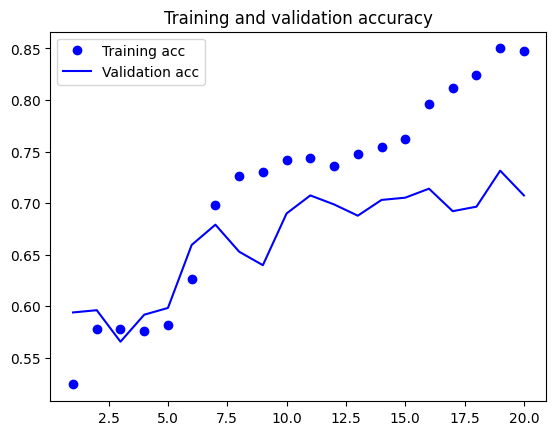

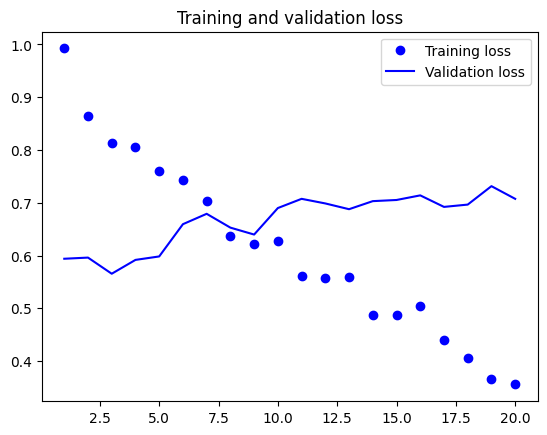

In [15]:
# Visualize
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_accuracy']
loss = history.history['loss']
epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()




**Using a Pretrained Network - VGG 16**

In [20]:
from keras.applications import VGG16
from keras.layers import Input, Lambda
import tensorflow as tf

import numpy as np

In [29]:
convolution_base = VGG16(weights = 'imagenet', include_top = False, input_shape = (150, 150, 3))
# define input layer that will match the input shape of the VGG16 model
input_layer = Input(shape = (150,150,1))
# replicate the grayscale channel across all three color channels
grayscale_input = Lambda(lambda x: tf.repeat(x, 3, axis=-1))(input_layer)
conv_output = convolution_base(grayscale_input)



In [ ]:
convolution_base.summary();

In [23]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
batch_size = 50

In [30]:
 # convert grayscale images to RGB
def grayscale_to_rgb(images):
  return np.repeat(images, 3, -1)

In [46]:
def extract_features(directory, sample_count):
  conv_output_shape = convolution_base.output_shape[1:]
  #features =np.zeros(shape =  (sample_count, 4, 4, 512))
  labels = np.zeros(shape = (sample_count))
  features =np.zeros(shape =  (sample_count, np.prod(conv_output_shape)))
  generator = train_datagen.flow_from_directory(train_dir, target_size = (150, 150), batch_size = batch_size, class_mode = 'categorical', color_mode = 'grayscale')
  i = 0
  for input_batch, labels_batch in generator:
    features_batch = convolution_base.predict(grayscale_to_rgb(input_batch))
     # reshape the features_batch to have 3 channels
    features_batch = np.repeat(features_batch, 3, axis=-1)
    features[i * batch_size : (i +1)*batch_size] = features_batch.reshape(batch_size, -1)
    labels[i*batch_size: (i + 1)*batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      break
    return features, labels


In [ ]:
#train_features, train_labels = extract_features(train_dir, 1100)
#validation_features, validation_labels = extract_features(validation_dir, 458)



In [ ]:
# Visualize
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_accuracy']
loss = history.history['loss']
epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()